## Extracting Building Footprints from OpenMap

The most useful functions I found from the osmnx library. For more information, go to: https://github.com/gboeing/osmnx-examples

In [ ]:
#pip install osmnx shapely geopandas pyproj rasterio --quiet
#pip install --quiet osmnx[all] folium mapclassify

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pathlib import Path
import pandas as pd
import osmnx as ox
from IPython.display import Image

ox.__version__

'2.0.7'

In [ ]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240

# specify that we're retrieving building features from OSM
tags = {"building": True}

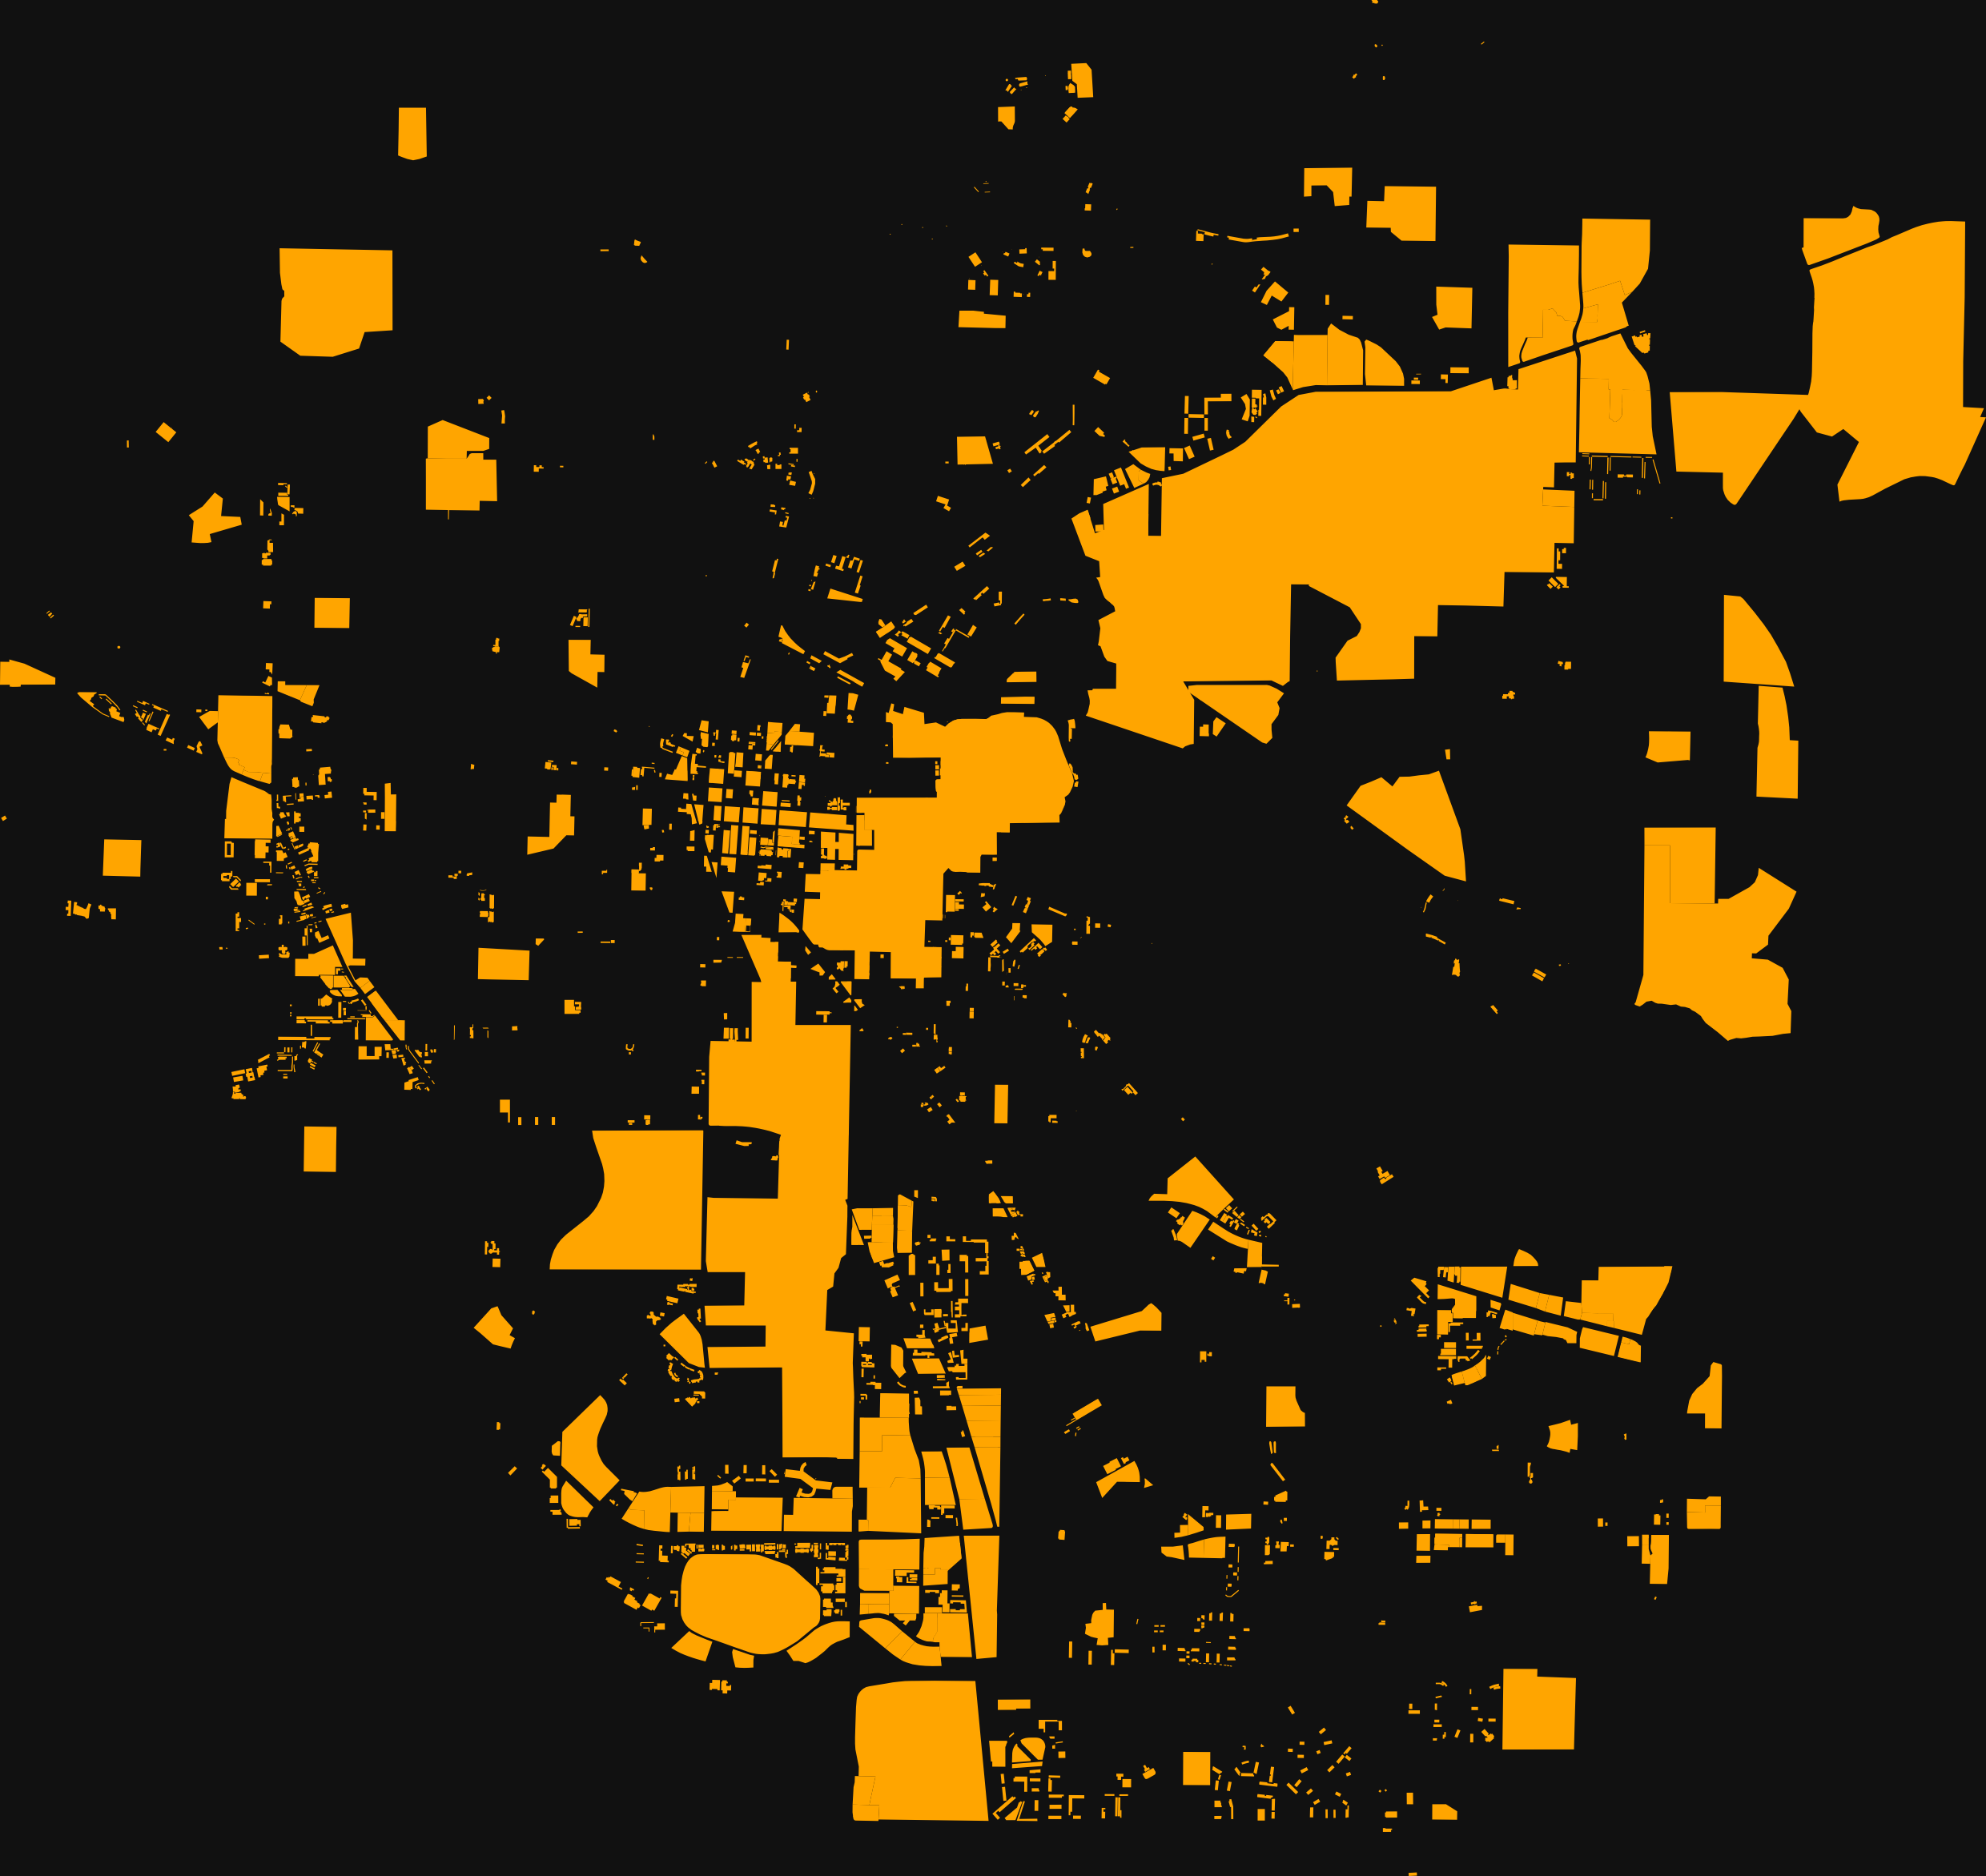

In [ ]:
# Streamlit version
selection = st.selectbox # whatever city is selected

gdf = ox.features.features_from_place({selection}, tags)
gdf_proj = ox.projection.project_gdf(gdf)
fp = f"./{img_folder}/{selection}_bldgs.{extension}"
fig, ax = ox.plot.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

# OG version
gdf = ox.features.features_from_place("Ann Arbor, Michigan, USA", tags)
gdf_proj = ox.projection.project_gdf(gdf)
fp = f"./{img_folder}/tucson_bldgs.{extension}"
fig, ax = ox.plot.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

In [ ]:
# save as a GeoPackage
gdf_save = gdf.map(lambda x: str(x) if isinstance(x, list) else x)
Path("data").mkdir(parents=True, exist_ok=True)
gdf_save.to_file(f"./data/{selection}_bldgs.gpkg", driver="GPKG")

In [ ]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
#areas.head()

element   id        
node      3153686913       0.000000
relation  3349739        464.852571
          19682623       642.523626
way       28861558      1830.805124
          28861563       779.361416
dtype: float64

In [9]:
# total area (sq m) covered by building footprints
sum(areas)

883355.4893654705

In [ ]:
# get the total area within Piedmont's admin boundary in sq meters
place = ox.geocoder.geocode_to_gdf({selection})
place_proj = ox.projection.project_gdf(place)
place_proj.area.iloc[0]

4348556.9414643

In [ ]:
# what proportion of the city is covered by building footprints?
# Add to City Specs, if possible break into R/C
sum(areas) / place_proj.area.iloc[0]

0.20313761582434656

Use the geometries module to download features, such as grocery stores, transit stops, points of interest, or building footprints, and turn them into a GeoDataFrame: see docs.

To query, pass a tags dict where keys are OSM tags. The dict's values can be either:

1. True to retrieve all OSM objects with this tag, regardless of its value
2. a single value as a string to retrieve all OSM objects with this tag:value combination
3. a list of string values to retrieve all OSM objects where this tag matches any of these values

Pass multiple dict key:value pairs to retrieve the union (not intersection) of these pairs.

In [27]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Tucson, Arizona"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(209458, 353)

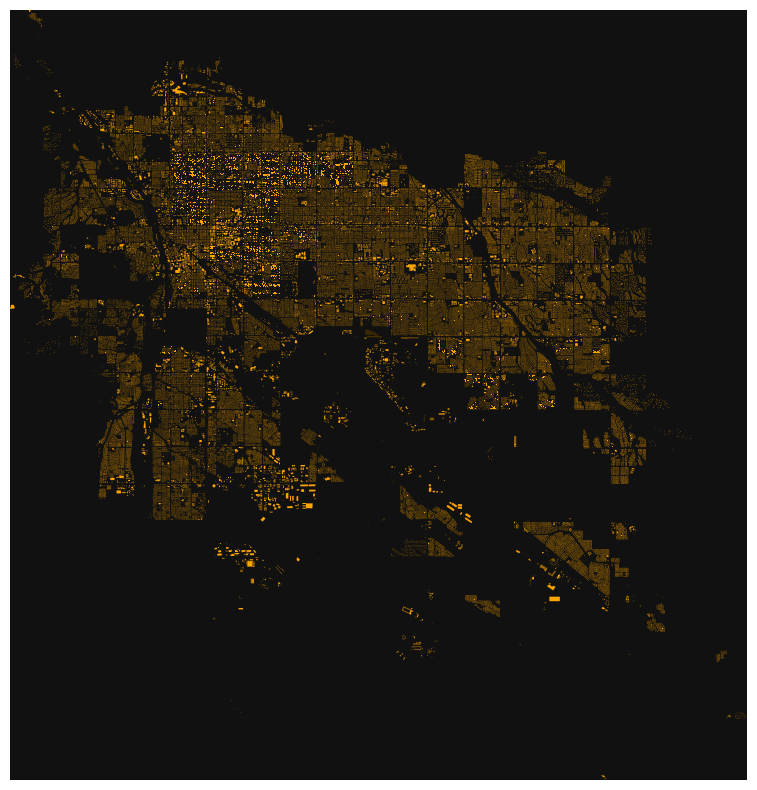

In [28]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(10, 10))

In [ ]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.features.features_from_place({selection}, tags)
gdf.shape

(162, 70)

In [ ]:
# view just the bus stops
gdf[gdf["landuse"] == "commercial"].dropna(axis=1, how="any").head()

geometry  \
element id                                        
node    4071030440  POINT (-122.21517 37.81248)   
        5845148873  POINT (-122.21492 37.81822)   
        5845152990  POINT (-122.21459 37.81818)   
        5845153014  POINT (-122.22303 37.81763)   
        5845153034  POINT (-122.22265 37.81779)   

                                                  name  bus   highway  \
element id                                                              
node    4071030440  Park Boulevard & Saint James Drive  yes  bus_stop   
        5845148873     Hampton Road & Sandringham Road  yes  bus_stop   
        5845152990     Hampton Road & Sandringham Road  yes  bus_stop   
        5845153014       Hampton Road & Seaview Avenue  yes  bus_stop   
        5845153034       Hampton Road & Seaview Avenue  yes  bus_stop   

                       network public_transport    ref route_ref  
element id                                                        
node    4071030440  AC Transit         platform  57544  V;33;688  
        5845148873  AC Transit         platform  53832        33  
        5845152990  AC Transit         platform  50830        33  
        5845153014  AC Transit         platform  53865        33  
        5845153034  AC Transit         platform  53238        33

In [ ]:
# explore a neighborhood's buildings interactively
gdf = ox.features.features_from_place(
    selection,
    tags={"building": True},
)
cols = ["Height", "Address: housenumber", "Address: street", "Address: postcode"]   # OG: cols = ["height", "addr:housenumber", "addr:street", "addr:postcode"]
gdf.explore(tiles="cartodbdarkmatter", tooltip=cols)                                # Consider adding relevent data for us-num panels, energy produced, R/C, etc

# you can save a web map as an HTML file for reuse elsewhere
#m.save("data/graph.html")

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001D01C0E3290>>
Traceback (most recent call last):
  File "C:\Users\Owner\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


MemoryError: 

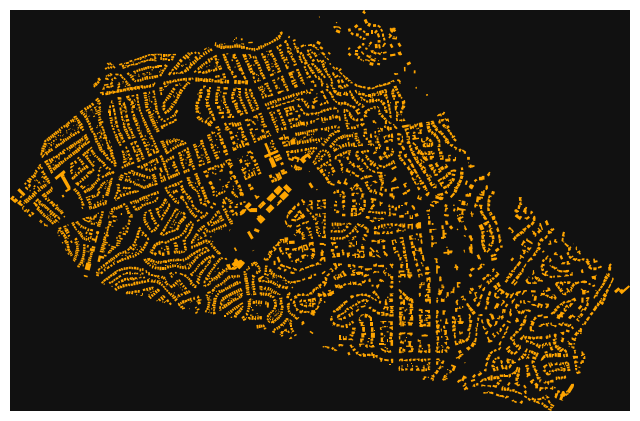

In [ ]:
# get all the building footprints in a city
gdf = ox.features.features_from_place(selection, {"building": True})
#gdf.shape
fig, ax = ox.plot.plot_footprints(gdf)

In [ ]:
# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap="plasma")    # How can we use these colors to mark R/C buildings?

['#0d0887', '#7e03a8', '#cc4778', '#f89540', '#f0f921']